In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [85]:
import os
datafolder=r'D:\Ameyem\python\ML\Data\SeismicImage\SynthImages/'

noisefolder=datafolder+'noise/'
cleanfolder=datafolder+'clean/'
# noisefiles=os.listdir(noisefolder)
cleanfiles=os.listdir(cleanfolder)
# noisefiles

In [8]:
from PIL import Image
# fname=cleanfiles[0]
# img = Image.open(cleanfolder+fname)
# # imarray=np.array(img)
# img.size

array(['550.png', '445.png'], dtype='<U7')

In [103]:




def getrandomCrops(imfile,input_imsize=(320,320),nims=4):
    cimg = Image.open(cleanfolder+imfile)
    nimg = Image.open(noisefolder+imfile)
    cimg=cimg.convert('L')
    nimg=nimg.convert('L')
    width, height = cimg.size
    cleanimages=[]
    noiseimages=[]
    
    for i in range(nims):
        # Setting the points for cropped image
        left = np.random.randint(0,width-input_imsize[0])
        top = np.random.randint(0,height-input_imsize[1])
        right = left+input_imsize[0]
        bottom = top++input_imsize[1]

        # Cropped image of above dimension
        # (It will not change original image)
#         
        
#         print(cimg.crop((left, top, right, bottom)).size,np.array(cimg.crop((left, top, right, bottom))).shape)
        cleanimages.append(np.array(cimg.crop((left, top, right, bottom))))
#         print(cleanimages[-1].shape)
        
        noiseimages.append(np.array(nimg.crop((left, top, right, bottom))))
    return cleanimages,noiseimages

def DataGenerator(cleanfiles,numberofims=10):
    input_imsize=(320,320)
    files=np.random.choice(cleanfiles,numberofims)
    cleanimages=[]
    noiseimages=[]
    for f in files:
        c,n=getrandomCrops(f,input_imsize=(320,320),nims=4)
#         print(np.array(c).shape)
        cleanimages.extend(c)
        noiseimages.extend(n)
    print(np.array(cleanimages).shape)
    return np.array(cleanimages).astype('float32').reshape(len(cleanimages),*input_imsize,1) / 255., \
            np.array(noiseimages).astype('float32').reshape(len(cleanimages),*input_imsize,1) / 255. 

In [59]:
input_imsize=(320,320)

In [60]:
import numpy as np
from sklearn.model_selection import train_test_split



(40, 320, 320)


In [61]:
X_train_noisy.shape

(26, 320, 320, 1)

In [50]:
# (x_train, _), (x_test, _) = fashion_mnist.load_data()

In [ ]:
# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.

# x_train = x_train[..., tf.newaxis]
# x_test = x_test[..., tf.newaxis]

# print(x_train.shape)

In [92]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(*input_imsize, 1)),
      layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [96]:
runs=20
for i in range(runs):
    print('Runn333333333333333333333333333#################### ',i)
    cims,nims=DataGenerator(cleanfiles,numberofims=20)
    X_train_noisy, X_test_noisy, X_train_clean, X_test_clean = train_test_split(
        nims, cims, test_size=0.33, random_state=42)
    autoencoder.fit(X_train_noisy, X_train_clean,
                    epochs=10,
                    shuffle=True,
                    validation_data=(X_test_noisy, X_test_clean))

Runn333333333333333333333333333####################  0
(80, 320, 320)
Epoch 1/10
2/2 [==============================] - 3s 1s/step - loss: 0.0519 - val_loss: 0.0546
Epoch 2/10
2/2 [==============================] - 3s 1s/step - loss: 0.0518 - val_loss: 0.0534
Epoch 3/10
2/2 [==============================] - 2s 1s/step - loss: 0.0506 - val_loss: 0.0523
Epoch 4/10
2/2 [==============================] - 2s 1s/step - loss: 0.0497 - val_loss: 0.0517
Epoch 5/10
2/2 [==============================] - 2s 996ms/step - loss: 0.0488 - val_loss: 0.0511
Epoch 6/10
2/2 [==============================] - 2s 980ms/step - loss: 0.0483 - val_loss: 0.0508
Epoch 7/10
2/2 [==============================] - 2s 980ms/step - loss: 0.0481 - val_loss: 0.0505
Epoch 8/10
2/2 [==============================] - 2s 1s/step - loss: 0.0476 - val_loss: 0.0500
Epoch 9/10
2/2 [==============================] - 2s 1s/step - loss: 0.0473 - val_loss: 0.0497
Epoch 10/10
2/2 [==============================] - 2s 1s/step - lo

(80, 320, 320)
Epoch 1/10
2/2 [==============================] - 3s 1s/step - loss: 0.0370 - val_loss: 0.0327
Epoch 2/10
2/2 [==============================] - 3s 2s/step - loss: 0.0368 - val_loss: 0.0319
Epoch 3/10
2/2 [==============================] - 3s 2s/step - loss: 0.0363 - val_loss: 0.0321
Epoch 4/10
2/2 [==============================] - 3s 2s/step - loss: 0.0360 - val_loss: 0.0323
Epoch 5/10
2/2 [==============================] - 3s 2s/step - loss: 0.0360 - val_loss: 0.0318
Epoch 6/10
2/2 [==============================] - 3s 1s/step - loss: 0.0357 - val_loss: 0.0318
Epoch 7/10
2/2 [==============================] - 2s 1s/step - loss: 0.0354 - val_loss: 0.0320
Epoch 8/10
2/2 [==============================] - 3s 1s/step - loss: 0.0354 - val_loss: 0.0316
Epoch 9/10
2/2 [==============================] - 3s 1s/step - loss: 0.0352 - val_loss: 0.0316
Epoch 10/10
2/2 [==============================] - 3s 1s/step - loss: 0.0350 - val_loss: 0.0317
Runn333333333333333333333333333###

2/2 [==============================] - 3s 2s/step - loss: 0.0616 - val_loss: 0.0418
Epoch 2/10
2/2 [==============================] - 3s 2s/step - loss: 0.0549 - val_loss: 0.0363
Epoch 3/10
2/2 [==============================] - 3s 2s/step - loss: 0.0487 - val_loss: 0.0398
Epoch 4/10
2/2 [==============================] - 3s 2s/step - loss: 0.0477 - val_loss: 0.0431
Epoch 5/10
2/2 [==============================] - 3s 2s/step - loss: 0.0500 - val_loss: 0.0408
Epoch 6/10
2/2 [==============================] - 3s 2s/step - loss: 0.0470 - val_loss: 0.0441
Epoch 7/10
2/2 [==============================] - 3s 2s/step - loss: 0.0479 - val_loss: 0.0406
Epoch 8/10
2/2 [==============================] - 3s 2s/step - loss: 0.0464 - val_loss: 0.0384
Epoch 9/10
2/2 [==============================] - 3s 2s/step - loss: 0.0454 - val_loss: 0.0380
Epoch 10/10
2/2 [==============================] - 3s 2s/step - loss: 0.0447 - val_loss: 0.0380
Runn333333333333333333333333333####################  17
(80,

In [97]:

cims,nims=DataGenerator(cleanfiles,numberofims=5)
X_train_noisy, X_test_noisy, X_train_clean, X_test_clean = train_test_split(
        nims, cims, test_size=0.90, random_state=42)
X_test_noisy.shape

(20, 320, 320)


(18, 320, 320, 1)

In [102]:
np.save('X_test_noisy.npy',X_test_noisy)

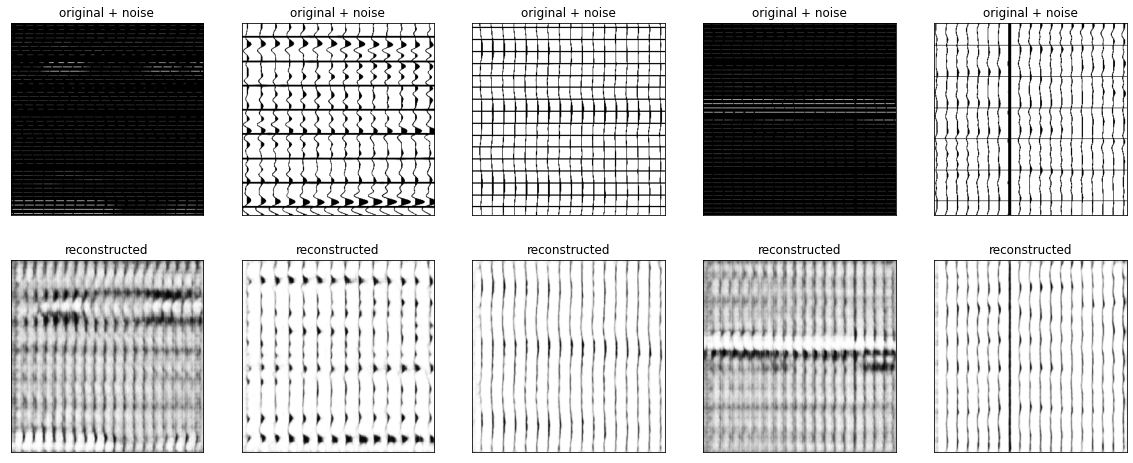

In [98]:
encoded_imgs = autoencoder.encoder(X_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 5
plt.figure(figsize=(20, 8))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(X_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

In [99]:
autoencoder.encoder.save(datafolder+'autoencoder_encoder_64.h5')

autoencoder.decoder.save(datafolder+'autoencoder_decoder_64.h5')

In [100]:
datafolder

'D:\\Ameyem\\python\\ML\\Data\\SeismicImage\\SynthImages/'

In [72]:
cims,nims=DataGenerator(cleanfiles,numberofims=10)
X_train_noisy, X_test_noisy, X_train_clean, X_test_clean = train_test_split(
        nims, cims, test_size=0.77, random_state=42)

(40, 320, 320)


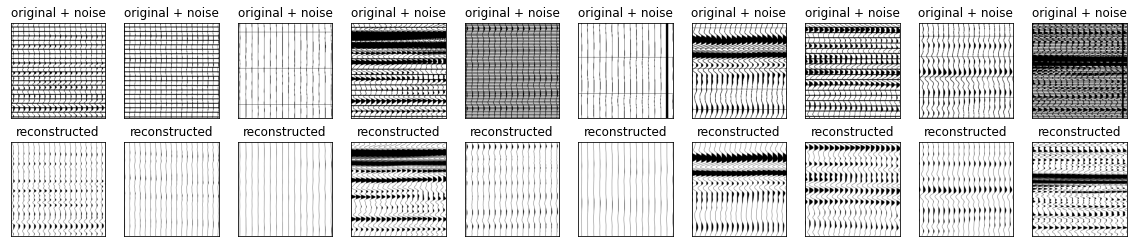

In [73]:
# encoded_imgs = autoencoder.encoder(X_test_noisy).numpy()
# decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(X_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(X_test_clean[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()